# All DM plots

In [25]:
import redis
import numpy
import math
import transvis.io as t
import matplotlib.pyplot as plt
import scipy
import scipy.stats
%matplotlib inline

In [26]:
t.initDB()

In [27]:
import math
MAL = [m for m, _, _, _ in t.alleleData()]
def name_to_plot(name):
    plt.figure()
    plt.title(name)
    def avg(data):
        return sum(data)/len(data)
    unique_ids = []
    #probeset_ids = []
    #for trans_name in [name]:
    #    trans_ids = t.getGenecodeGenenameToProbeset(trans_name)
        #for trans_id in trans_ids:
        #    if trans_id not in unique_ids:
        #        unique_ids.append(trans_id)
        #        probeset_ids += list(t.transToProbeset(trans_id))

    def lez(a):
        if a < 0:
            return -1
        else:
            return 1
        import scipy.stats

    slope_pvalue_intensity_position = []
    for probeset_key in t.getGenecodeGenenameToProbeset(name):
        #
        #
        probesets = t.probesetData(probeset_key)
        #probesets = t.probesetPatientData(probeset)
        #plt.figure()
        slopes = []
        pvalues = []
        for probeset in probesets:
            probeset = [math.log(i) for i in probeset]
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(MAL, probeset)
            left = t.probesetAnnotationMetadata(probeset_key)[3]
            slope_pvalue_intensity_position.append([slope, p_value, avg(probeset), left])

    zipped_properties = list(zip(*slope_pvalue_intensity_position))
    slope, intensity, pvalues, position = zipped_properties[0], zipped_properties[2], zipped_properties[1], zipped_properties[3]
    plt.xlabel("position in genomic coordinates")
    plt.ylabel("-log(pvalue)")
    plt.scatter(position, [-math.log(pvalue, 10) * lez(s) for pvalue, s in zip(pvalues, slope)])
    plt.plot(position, [-math.log(0.05, 10)] * len(position))
    plt.plot(position, [0] * len(position))
    plt.plot(position, [math.log(0.05, 10)] * len(position))
    plt.plot(position, [-math.log(0.05/len(position), 10)] * len(position))
    plt.plot(position, [math.log(0.05/len(position), 10)] * len(position))

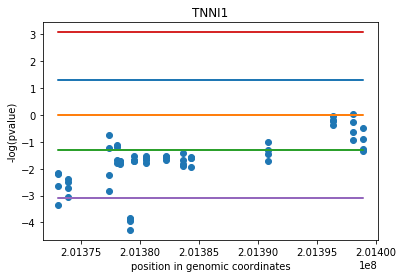

In [28]:
name_to_plot("TNNI1")

In [29]:
nakamori_genes = ["SOS1", "ATP2A1", "ALPK3", "NFIX", "INSR", "CAPZB", "ARFGAP2", "PDLIM3", "CACNA1S", "CAMK2B", "VPS39", "CLCN1", "LDB3", "GFPT1", "DTNA", "IMPDH2", "MBNL1", "NRAP", "ANK2", "OPA", "RYR1", "COPZ2", "KIF13A", "TTN", "PHKA1", "FHOD1", "MBNL2", "DMD", "OHKA1", "MLF1", "ABLIM2", "UBE2D3", "BIN1", "LDB3", "TBC1D15", "USP25", "TXNL4A", "VEGFA", "CAPN3", "ATP2A2"]

doesn't work for OPA


/apps/transvis/venv3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


doesn't work for OHKA1


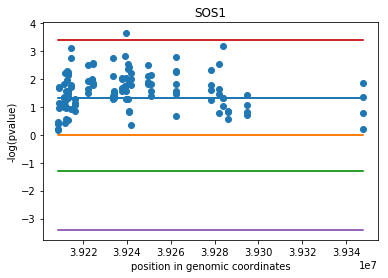

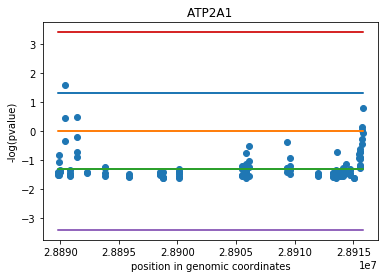

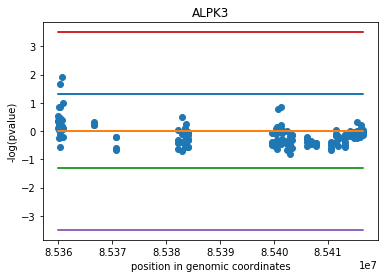

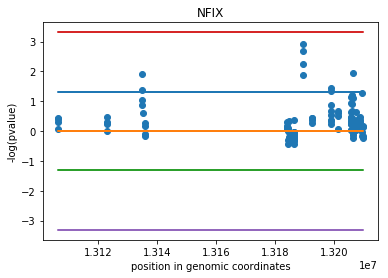

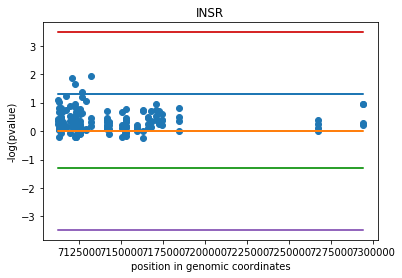

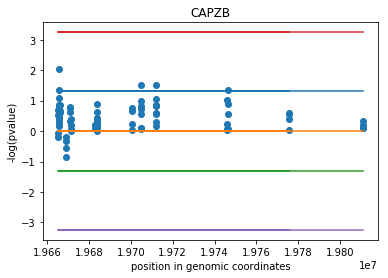

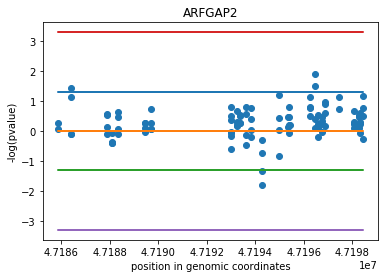

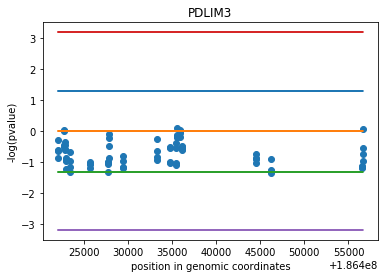

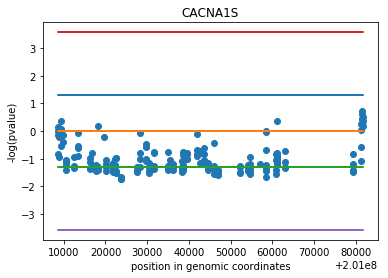

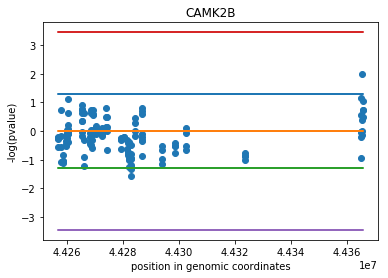

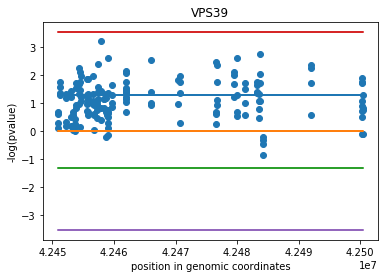

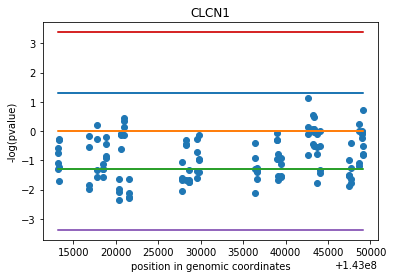

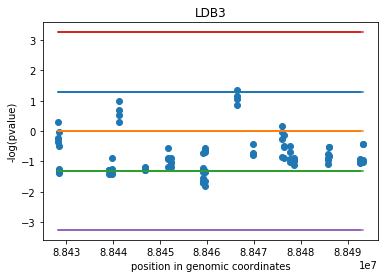

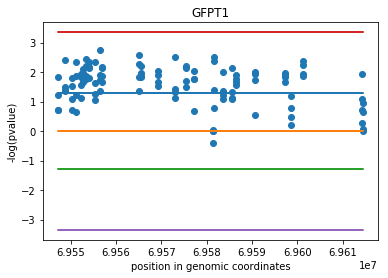

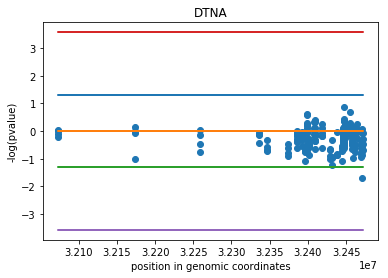

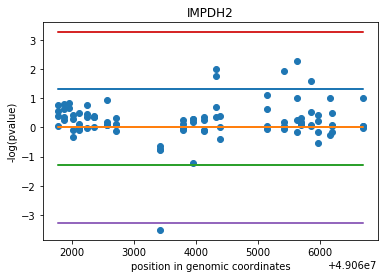

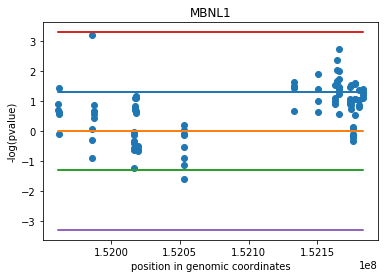

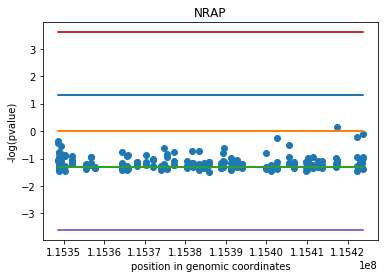

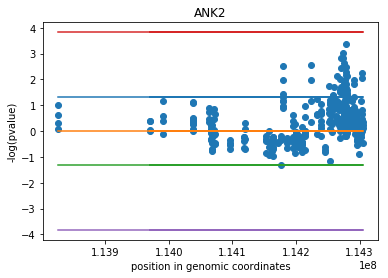

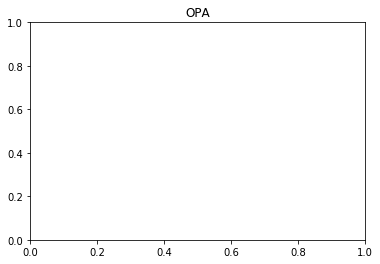

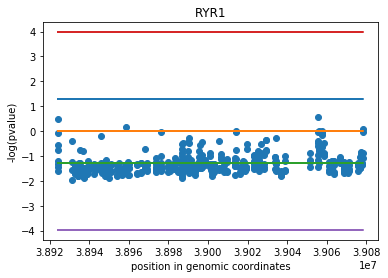

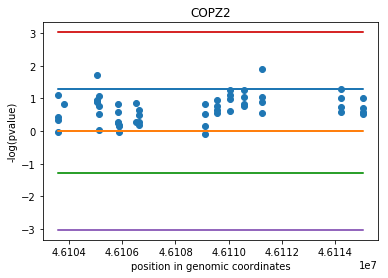

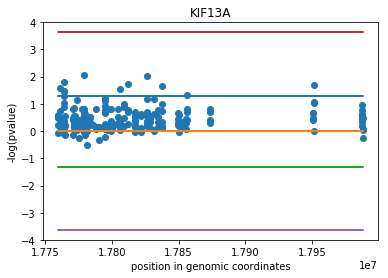

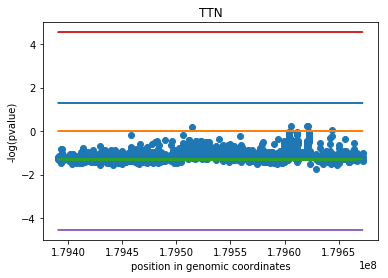

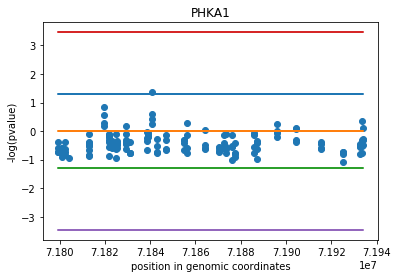

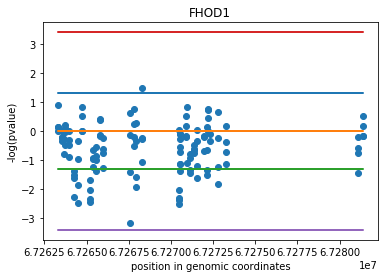

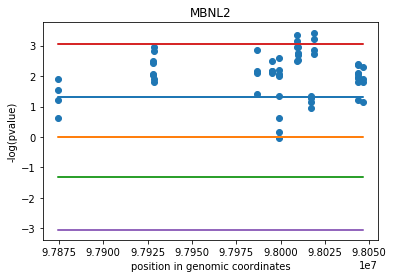

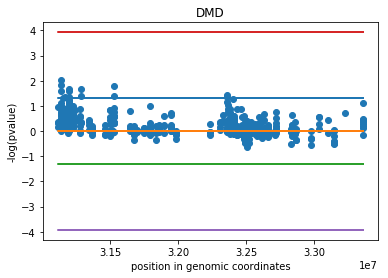

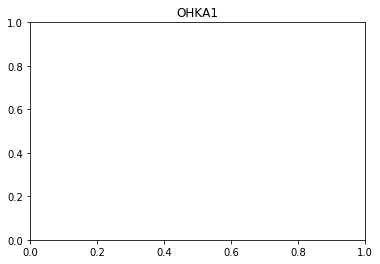

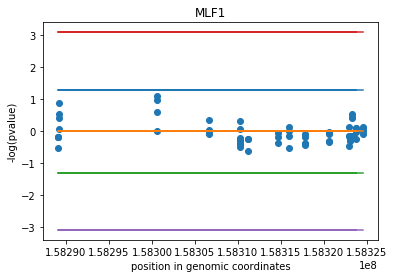

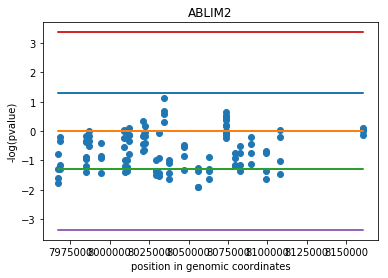

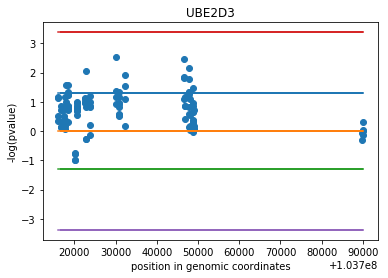

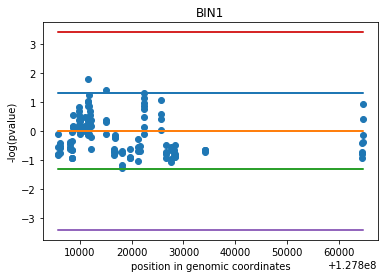

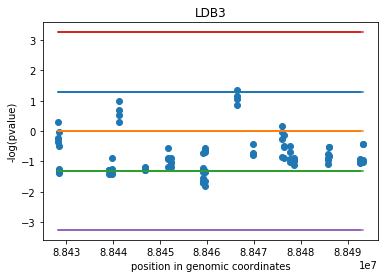

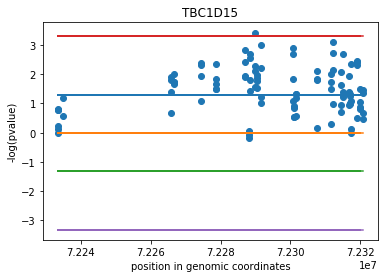

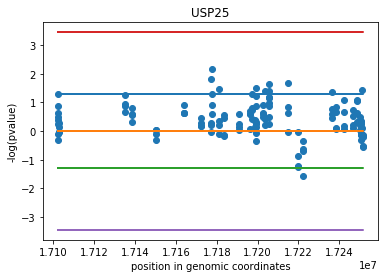

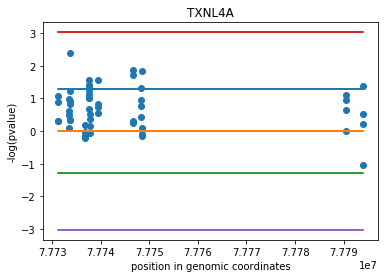

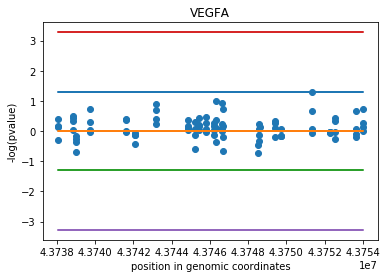

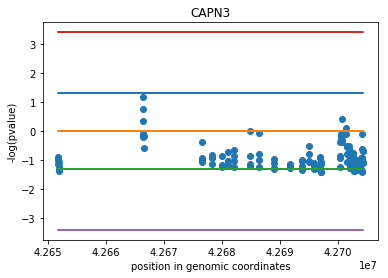

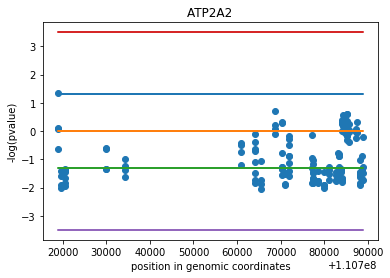

In [31]:
for name in nakamori_genes:
    try:
        name_to_plot(name)
    except:
        print("doesn't work for", name)

In [48]:
extra_genes = ["TNNI1", "TPM2", "TPM3"]

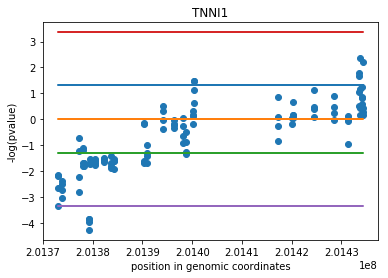

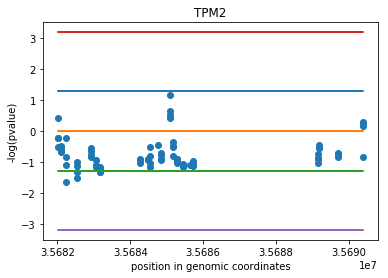

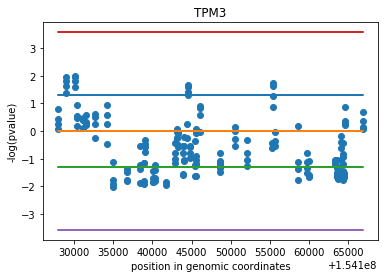

In [50]:
for name in extra_genes:
    try:
        name_to_plot(name)
    except:
        print("doesn't work for", name)